In [18]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_copy= churn_data
churn_data.drop(['RowNumber'], axis=1, inplace= True) #удалили столбец с номером строки
churn_data.head()
exited= churn_data.groupby(by='Exited')['Exited'].value_counts()
#exited.plot(kind = 'pie', figsize=(7,7), autopct='%1.2f%%', explode=(0.1, 0.1), shadow=True, startangle=50, title='Соотношение ушедших клиентов')
#display(exited)

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots



9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.




In [19]:

#exited= churn_data.groupby(by='Exited')['Exited'].value_counts()
#exited.plot(kind = 'pie', figsize=(7,7), autopct='%1.2f%%', explode=(0.1, 0.1), shadow=True, startangle=50, title='Соотношение ушедших клиентов', labels=('оставшиеся', 'ушедшие'))

In [20]:
from operator import index
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = px.pie(
    values=exited, 
    names=('оставшиеся клиенты', 'ушедшие клиенты'), 
    width=500, height=500, 
    title='Соотношение ушедших и оставшихся клиентов',
    )
fig.show()

Ушедшие клиенты составляют пятую часть (20%) от общего числа клиентов.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [21]:
churn_data.head()
balance_dist = churn_data[churn_data['Balance'] > 2500]['Balance']
#display(balance_dist)
fig = px.histogram(data_frame=balance_dist,
                   nbins=15,
                   title='Распределение баланса пользователей со счетами более 2500$',
                   width=800,
                   height=500,
                   )
fig.update_layout(
    yaxis_title='количество клиентов',
    xaxis_title='Баланс счёта'
    )
fig.show()

In [22]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#histogram_data = churn_data[churn_data['Balance']>2500]
#fig, ax = plt.subplots(figsize=(10, 6))
#n_bins = 15
#ax.hist(histogram_data['Balance'], bins=n_bins)
#ax.set_ylabel('количество клиентов', color='r', fontsize=16)
#ax.set_xlabel('Баланс счета', color='r', fontsize=16)
#ax.set_title('Распределение пользователей с балансом счета более 2500$', color='b', fontsize=18)
#plt.show()

Подавляющее большинство клиентов со счетами свыше 2500 долларов, имеют на счетах от 80 до 160 тыс долларов.
 При этом около половины таких клиентов, держат на счетах от 100 до 140 тысяч

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [23]:

plotly.express.box(data_frame=churn_data, x='Exited', y='Balance', title='Распределение балансов клиентов в разрезе признака оттока')

Ушедшие клиенты более состоятельные - 25%квартиль у них на уровне 37 тыс.$, медиана и 75%квартиль таже выше, чем у оставшихся клиентов. 

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [24]:
plotly.express.box(data_frame=churn_data, x='Exited', y='Age', title='Распределение балансов клиентов в разрезе признака ВОЗРАСТ')

Ушедшие клиенты более возрастные, чем оставшиеся. 25% квантиль ушедших 38 лет очень блихко к 75% квантилю оставшихся. Медианное значение и разброс квантилей 25%-75% расвномерное у ушедших и оставшихся клиентов. 
При этом следует учесть большое количество потеницальных выбросов у оставшиъся клиентов, возможно требуется перепроверить данные о возрасте.


9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0, 0.5, 'Кредитный рейтинг клиента')

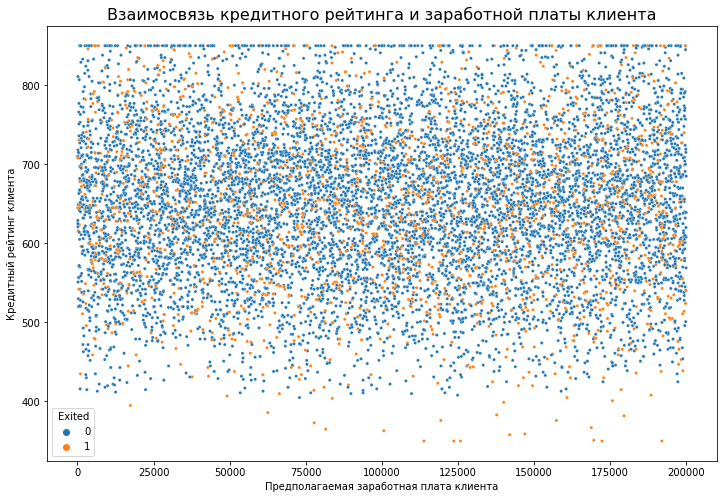

In [26]:
#display(churn_data.head())
import seaborn as sns


fig = plt.figure(figsize=(12, 8))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    s=10,
    )
scatterplot.set_title('Взаимосвязь кредитного рейтинга и заработной платы клиента', fontsize=16)
scatterplot.set_xlabel('Предполагаемая заработная плата клиента')
scatterplot.set_ylabel('Кредитный рейтинг клиента')

Не наблюдается взаимосвязи между кредитным рейтингом и предполагаемой заработной платой ни у ушедших ни у оставшихся клиентов.





9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [27]:
exit_men_women= churn_data[churn_data['Exited'] == 1]
#display(exit_men_women['Gender'].value_counts())
fig = px.pie(
    values=exit_men_women['Gender'].value_counts(), 
    names=('женщины', 'мужчины'), 
    width=500, height=500, 
    title='Распределение по полу ушедших клиентов',
    )
fig.show()


Чаще уходят женщины, но разница несущественна. Считаю, что в данном случае, пол не является решающим фактором у уходе клиента.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.


In [28]:

bar_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
#display(bar_data)
fig = px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='CustomerId',
    text_auto=True,
    color='Exited',
    height=500,
    width=800,
    title='Соотношение ушедших и лояльных клиентов в зависимости от числа услуг',
)
fig.update_layout(
    yaxis_title='количество клиентов',
    xaxis_title='количество продуктов'
    )
fig.show()

Подавляющее большинство клиентов приобрело 1-2 услуги банка. При этом Большая часть ушедших клиентов имели одну услугу. Таким образом, уход клиента не зависит от количества приобретенных им услуг. Возмможно дело в какой-то одной услуге, которая не нравится клиентам, но из нашего массива данных эту информацию не извлечь.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [29]:
bar_data = churn_data[churn_data['Exited'] == 1].groupby(['IsActiveMember'], as_index=False)[['Exited']].count()
#display(bar_data)
fig = px.histogram(
    data_frame=bar_data,
    x='IsActiveMember',
    y='Exited',
    #text_auto=True,
    color='IsActiveMember',
    height=500,
    width=800,
    title='Наличие статуса "активного клиента" у ушедших клиентов',
)
fig.update_layout(
    yaxis_title='количество клиентов',
    xaxis_title='Есть статус Активного клиента(1) или нет (0)'
)
fig.update_xaxes(type='category')
fig.show()

Количество ушедщих клиентов без статуса "Активный клиент" почти в два раза выше, чем с этим статусом. Возможно, что этот статус дает какие-то хорошие бонусы, которых не хватает ушедшим.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [30]:
bar_data = churn_data[churn_data['Exited'] == 1].groupby(['Geography'], as_index=False).count()
#display(bar_data)
#churn_data.info()
fig = px.choropleth(
    data_frame=bar_data, 
    locations="Geography", 
    locationmode = "country names", 
    color="CustomerId",  
    range_color=[0, 900], 
    title='Global Spread of COVID-19', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds' 
)

fig.show()


Больше всего ушедших клиентов проживают в Германии и Франции. Невозможно предположить с чем это может быть связано. как вообще по этим данным можно делать предположения? может уловия для различных стран отличаются, может законодательство разное в плане налогов на финансовые продукты.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [31]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')
#churn_data.groupby(['Tenure','CreditScoreCat'])['Exited'].mean().unstack()
churn_data.pivot_table(
    values='Exited',
    index='Tenure',
    columns='CreditScoreCat',
    aggfunc='mean'
)
fig = px.imshow(churn_data.pivot_table(
    values='Exited',
    index='Tenure',
    columns='CreditScoreCat',
    aggfunc='mean'
), text_auto=True, color_continuous_scale='amp')
fig.show()

Чаще всего уходят клиенты с очень плохим кредитным рейтингом. Причем нет зависимости от того, сколько лет они были клиентами банка (наибольшие показатели оттока у клиентов менее 1 года и у клиентов с 10 летним стажем).
Также стоит обратить внимание на довольно существенный отток у клиентов с превосходным кредитным рейтингом со стажем 9-10 лет.